In [170]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from math import pi

In [163]:
p = 0.4  # probabilidad de éxito del evento
n = 200 # número de repeticiones del evento

def ensayo(p,n):
    outcome = np.random.rand(n)<p
    return outcome

In [171]:
outcome = ensayo(p,n)
#print(outcome)
pi

3.141592653589793

In [176]:
def binomial(p, n):
    n = int(n)
    ns = 10000 # número de muestreos para calcular funcion de densidad
    pdf = np.zeros(n+1)
    for k in range(ns):
        resultado = np.sum(ensayo(p,n))
        pdf[resultado] += 1
    pdf = pdf / sum(pdf)
    return(pdf)

def poisson(p, n):
    pdf = np.zeros(n+1)
    a = p*n
    
    if n>100:
        r = range(100)
    else:
        r = range(len(pdf))

    for k in r:
        pdf[k] = np.exp(-a) * ((a**k) / factorial(k))
    return pdf

def gauss(p, n):
    pdf = np.zeros(n+1)
    u = n*p
    s = np.sqrt(n*p*(1-p))
    
    for k in range(len(pdf)):
        pdf[k] = (1.0/(s*np.sqrt(2*pi)))*np.exp((-(k-u)**2) / (2*s**2))
    return pdf

<IPython.core.display.Javascript object>


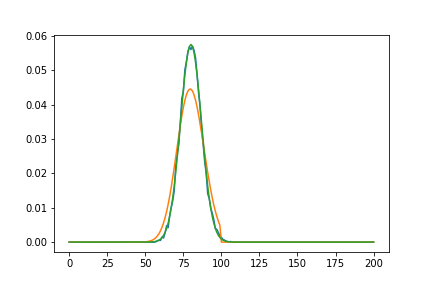

In [177]:
#print(binomial(p,n))
plt.plot(binomial(p,n))
#print(poisson(p,n))
plt.plot(poisson(p,n))
plt.plot(gauss(p,n))

[1.83156389e-02 4.57890972e-03 5.72363715e-04 4.76969763e-05
 2.98106102e-06 1.49053051e-07 6.21054379e-09 2.21805135e-10
 6.93141047e-12 1.92539180e-13 4.81347950e-15]


<IPython.core.display.Javascript object>


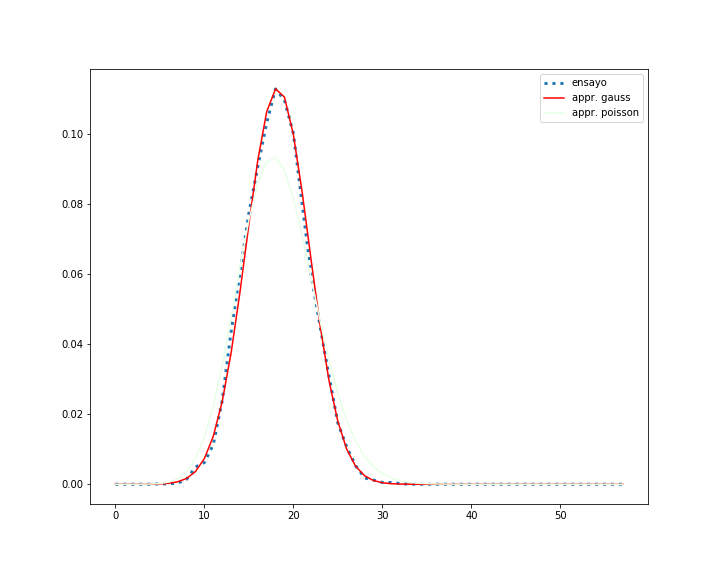

interactive(children=(FloatSlider(value=0.4, description='p', max=1.0, step=0.01), IntSlider(value=10, descrip…

In [197]:
import time

# set up plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylim([-0.1, 1.0])
ax.grid(True)
 
# generate x values

@widgets.interact(p=(0, 1, 0.01), n=(1, 100, 1))
def update(p = 0.4, n=10):
    """Remove old lines from plot and plot new one"""

    ylim = np.max(binomial(p,n))
    ax.set_ylim([-0.00001, ylim+ylim*0.2])
    ax.set_xlim([0.0, n])
    #print(binomial(p,n))
    [l.remove() for l in ax.lines]
    
    ax.cla()
    
    b= binomial(p,n)
    g = gauss(p,n)
    p = poisson(p,n)
    
    e_g = sum(abs(b-g))
    e_p = sum(abs(b-p))
    
    #print(e_g)
    #print(e_p)
    
    if (e_g > e_p):
        cp = 'g'
        cg = (1.0,0.9,0.9)
        print('la mejor approximacion es Poisson')
    else:
        cp = (0.9,1.0,0.9)
        cg = 'r'
        print('la mejor approximacion es Gauss')
        
    ax.plot(b, ls=':', lw=3, color='C0', label='ensayo')
    ax.plot(g, color=cg, label='appr. gauss')
    ax.plot(p, color=cp, label='appr. poisson')
    ax.legend()


In [73]:
binomial(0.4,10)

array([6.0600e+02, 4.0060e+03, 1.2061e+04, 2.1592e+04, 2.5093e+04,
       2.0037e+04, 1.1187e+04, 4.1870e+03, 1.0720e+03, 1.4700e+02,
       1.2000e+01])